In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 85% de los datos para entrenamiento y un 15% de los datos para validación
valid_idx  =  range ( len ( df ) - 43 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_RESPROBL', 'CSI_RETISOC', 'ANSIEDADRASGO', 'CSI_PENSDESID', 'TRAUMA_FRECUENCIA', 'CSI_EVITPROBL', 'CAPE_POSIT_FREC', 'CSI_APOYOSOC', 'SCL90_IDEA_PARAN', 'CSI_REESTCOGN', 'CSI_AUTOCRIT']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.314899  1.080404 -0.718996 -0.393056 ...  0.252581  2.618121  0.158335  0.67446 ]
 [-0.517872 -0.400472  0.198952 -0.393056 ...  0.252581  0.469445  0.344207  0.145201]
 [-1.126788 -0.612026  0.657926  0.272537 ... -0.423752 -0.311892 -0.399281 -0.384057]
 [-0.314899 -0.188918 -1.483953  0.771732 ...  0.083498 -0.897894 -1.142769  0.321621]
 [-0.720844  0.022635  1.269891 -0.892251 ...  0.083498  1.446116 -0.585153  0.321621]]
[0 0 0 0 1]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.977877,0.969328,0.697674,03:19
1,0.847219,0.900460,0.720930,02:55
2,0.787158,0.841386,0.744186,03:08
3,0.738281,0.799592,0.767442,03:07
4,0.705222,0.770896,0.790698,03:05


CSI_RESPROBL,CSI_RETISOC,ANSIEDADRASGO,CSI_PENSDESID,TRAUMA_FRECUENCIA,CSI_EVITPROBL,CAPE_POSIT_FREC,CSI_APOYOSOC,SCL90_IDEA_PARAN,CSI_REESTCOGN,CSI_AUTOCRIT,target,prediction
-0.7208,-0.8236,0.3519,0.7717,-0.3719,1.6571,-0.1545,1.6052,-0.8979,-0.3993,2.0858,0,0
1.5119,-0.4005,-0.7190,-1.2250,-0.9380,-0.5445,-0.3149,-0.0856,-0.8979,1.8312,-0.5605,0,0
-0.3149,0.2342,0.1990,0.1061,-0.7493,0.3361,-0.1545,-0.0856,1.2508,0.3442,0.4980,0,0
-1.5327,2.5613,-1.0250,0.6053,1.9866,2.7579,-0.3149,-1.4383,0.0788,-1.1428,-0.3841,1,1
-1.7357,1.0804,-0.8720,-1.0586,-0.3719,-1.2050,-0.1545,-1.6073,1.4461,-1.7004,0.4980,1,1


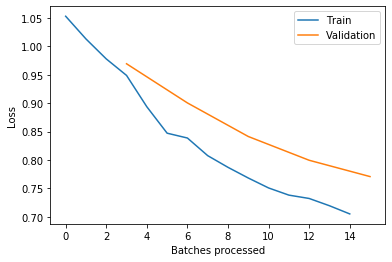

In [10]:
learn.recorder.plot_losses()
learn.show_results()

In [11]:
# el numero en el nombre es el porcentaje de precision, en este caso el porcentaje es 0.790698
learn.save("trained_model_790698", return_path=True)

WindowsPath('C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/models/trained_model_790698.pth')